# Package Installation

In [ ]:
!pip install ucimlrepo
!pip install lightgbm
!pip install miceforest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.4 MB/s eta 0:00:00


# Import

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import lightgbm as lgb
import miceforest as mf

from ucimlrepo import fetch_ucirepo

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Dataset

In [ ]:
lung_cancer = fetch_ucirepo(id=62)

X = lung_cancer.data.features
y = lung_cancer.data.targets

print(lung_cancer.metadata)
print(lung_cancer.variables)

{'uci_id': 62, 'name': 'Lung Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/62/lung+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/62/data.csv', 'abstract': 'Lung cancer data; no attribute definitions', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 32, 'num_features': 56, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1991, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C57596', 'creators': ['Z.Q. Hong', 'J.Y Yang'], 'intro_paper': None, 'additional_info': {'summary': "This data was used by Hong and Young to illustrate the power of the optimal discriminant plane even in ill-posed settings. Applying the KNN method in the resulting plane gave 77% accuracy. However, these results are strongly biased (See Aeberhard's second ref. above, or emai

In [ ]:
print(X.head(5))
X.describe()
# print(X["Attribute4"])
# print(X["Attribute38"])

   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           3           0         NaN           0           2   
1           0           3           3         1.0           0           3   
2           0           3           3         2.0           0           3   
3           0           2           3         2.0           1           3   
4           0           3           2         1.0           1           3   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute47  \
0           2           2           1            1  ...            2   
1           1           3           1            1  ...            2   
2           3           3           1            1  ...            2   
3           3           3           1            2  ...            2   
4           3           3           2            2  ...            2   

   Attribute48  Attribute49  Attribute50  Attribute51  Attribute52  \
0            2            2       

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute47,Attribute48,Attribute49,Attribute50,Attribute51,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56
count,32.000000,32.000000,32.000000,28.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.031250,2.375000,2.031250,1.392857,0.281250,2.187500,2.125000,2.406250,1.156250,1.406250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.176777,0.553581,1.031265,0.566947,0.456803,0.737804,0.751343,0.756024,0.514899,0.559918,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.750000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,0.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [ ]:
X.corr()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute47,Attribute48,Attribute49,Attribute50,Attribute51,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56
Attribute1,1.000000e+00,2.060214e-01,-3.594233e-01,NaN,2.871189e-01,-0.293701,-3.035884e-02,-0.098055,-5.537469e-02,-1.323983e-01,...,-4.637389e-02,-4.637389e-02,3.176256e-18,1.338649e-17,-1.047452e-17,0.063659,0.063659,-2.036533e-01,8.627960e-02,-2.871189e-01
Attribute2,2.060214e-01,1.000000e+00,-2.118938e-02,0.242197,-4.783649e-02,0.138215,-1.163350e-01,0.086711,-9.902466e-02,-2.992064e-01,...,-1.777047e-01,-1.777047e-01,-1.622214e-01,1.622214e-01,-1.147079e-01,0.243943,0.243943,-8.671100e-02,-2.571514e-01,3.029644e-01
Attribute3,-3.594233e-01,-2.118938e-02,1.000000e+00,0.403467,-1.925888e-02,0.076843,3.642821e-02,-0.099557,-2.524920e-01,-2.269535e-02,...,1.192393e-01,1.192393e-01,-8.708007e-02,-8.708007e-02,2.462996e-01,0.150590,0.150590,3.995220e-01,-1.429682e-01,-4.921715e-02
Attribute4,NaN,2.421971e-01,4.034673e-01,1.000000,3.703704e-02,-0.297082,-6.697737e-02,-0.026717,-1.849589e-01,7.818930e-02,...,-1.957122e-01,-1.957122e-01,-1.697250e-01,-1.697250e-01,7.809594e-02,-0.062439,-0.062439,4.222003e-02,-3.409752e-01,1.622882e-01
Attribute5,2.871189e-01,-4.783649e-02,-1.925888e-02,0.037037,1.000000e+00,-0.065802,2.702145e-01,-0.061297,-5.571605e-02,-8.276637e-02,...,1.256224e-01,1.256224e-01,1.965893e-01,1.965893e-01,-2.780192e-01,0.221718,0.221718,-1.488653e-01,3.005013e-01,-7.246377e-02
Attribute6,-2.937013e-01,1.382147e-01,7.684310e-02,-0.297082,-6.580223e-02,1.000000,3.055050e-01,0.495179,1.751335e-01,2.000952e-01,...,-6.666667e-02,-6.666667e-02,-1.217161e-01,1.217161e-01,-1.721326e-01,0.189133,0.091516,5.421667e-02,-9.647146e-02,2.572269e-01
Attribute7,-3.035884e-02,-1.163350e-01,3.642821e-02,-0.066977,2.702145e-01,0.305505,1.000000e+00,0.078085,3.126867e-02,2.587912e-01,...,-4.364358e-02,-4.364358e-02,2.390457e-01,-7.597496e-17,-8.451543e-02,-0.035947,-0.035947,4.046218e-01,-2.435994e-01,1.174846e-02
Attribute8,-9.805528e-02,8.671100e-02,-9.955727e-02,-0.026717,-6.129748e-02,0.495179,7.808491e-02,1.000000,2.460108e-01,2.071799e-01,...,-3.144567e-01,-3.144567e-01,-4.751311e-01,-1.187828e-01,-1.679842e-01,-0.092288,-0.092288,-2.804233e-01,-2.757148e-01,7.151372e-01
Attribute9,-5.537469e-02,-9.902466e-02,-2.524920e-01,-0.184959,-5.571605e-02,0.175133,3.126867e-02,0.246011,1.000000e+00,5.559543e-01,...,-7.960613e-02,-7.960613e-02,-3.488166e-01,-1.500792e-16,-8.900722e-17,0.109279,0.109279,-1.009939e-01,-1.678567e-01,1.928632e-01
Attribute10,-1.323983e-01,-2.992064e-01,-2.269535e-02,0.078189,-8.276637e-02,0.200095,2.587912e-01,0.207180,5.559543e-01,1.000000e+00,...,-1.903345e-01,-1.903345e-01,-3.207708e-01,-3.207708e-01,5.012121e-18,-0.124611,-0.124611,-3.572066e-02,-2.270009e-01,2.088866e-01


In [ ]:
print(y.head())
print(y["class"].unique())

   class
0      1
1      1
2      1
3      1
4      1
[1 2 3]


# Get null / nan values

In [ ]:
def get_null_values(data):
  null_values = data.isnull().sum()
  return null_values[null_values > 0]

print("Null values: \n")
print(get_null_values(X))

def get_nan_values(data):
  nan_values = data.isna().sum()
  return nan_values[nan_values > 0]

print("NaN values: \n")
print(get_nan_values(X))

Null values: 

Attribute4     4
Attribute38    1
dtype: int64
NaN values: 

Attribute4     4
Attribute38    1
dtype: int64


# Display null values in matrix msno

<Axes: >

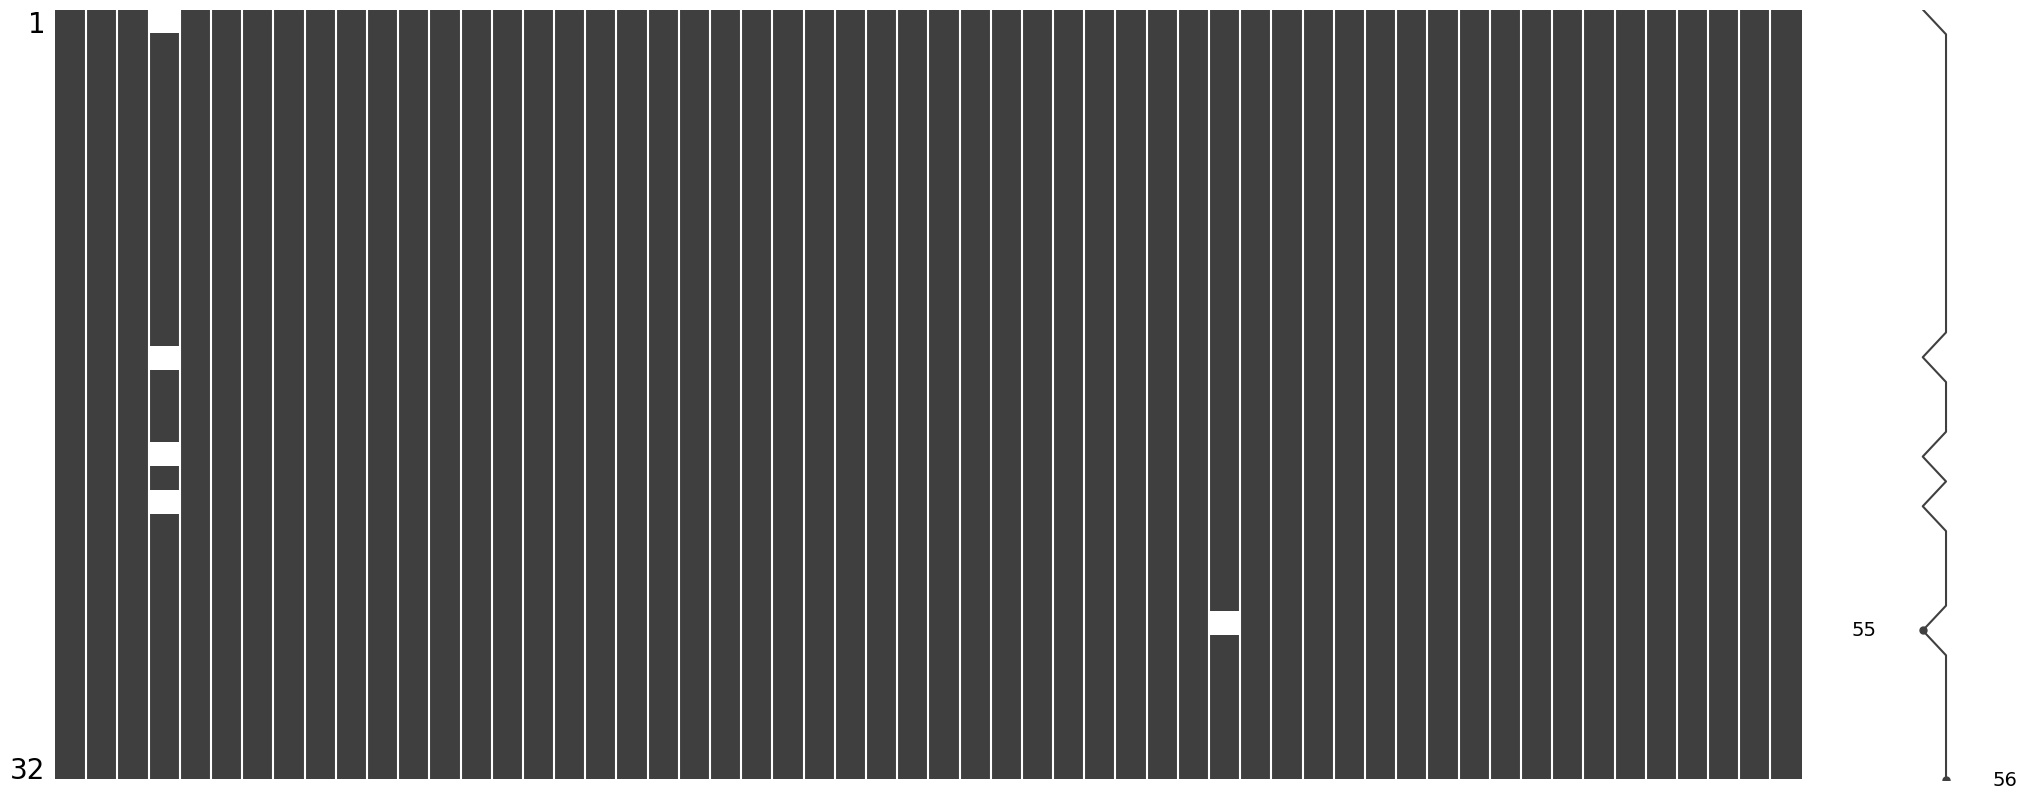

In [ ]:
msno.matrix(X)

In [ ]:
X[['Attribute4', 'Attribute38']].describe()

,Attribute4,Attribute38
count,28.000000,31.000000
mean,1.392857,1.709677
std,0.566947,0.588419
min,0.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,2.000000
max,2.000000,3.000000


# Get Default algorithms

In [ ]:
def get_default_classifier():
  # Without hyperparameter setting
  classifiers = {
      'SVC': {
          'class': SVC(),
          'params': {}
      },
      'RF': {
          'class': RandomForestClassifier(),
          'params': {}
      },
      # 'logistic_regression': {
      #     'class': LogisticRegression(),
      #     'params': {
      #         'max_iter': [1, 5, 10]
      #     }
      # },
      'NB': {
          'class': GaussianNB(),
          'params': {}
      },
      'GB': {
          'class': GradientBoostingClassifier(),
          'params': {}
      },
      'DT': {
        'class': DecisionTreeClassifier(),
        'params': {}
      },
      'KNN': {
        'class': KNeighborsClassifier(),
        'params': {}
      },
  }

  return classifiers

print(get_default_classifier())

{'SVC': {'class': SVC(), 'params': {}}, 'RF': {'class': RandomForestClassifier(), 'params': {}}, 'NB': {'class': GaussianNB(), 'params': {}}, 'GB': {'class': GradientBoostingClassifier(), 'params': {}}, 'DT': {'class': DecisionTreeClassifier(), 'params': {}}, 'KNN': {'class': KNeighborsClassifier(), 'params': {}}}


# Display Performance results on bar Chart

In [ ]:
def displayBarChartPlot(classifiers, accuracy_list, method):
  classifiers_names = list(classifiers.keys())

  fig, ax = plt.subplots()

  ax.bar(classifiers_names, accuracy_list, label='Accuracy', color='skyblue')

  ax.set_xlabel('Classifiers')
  ax.set_ylabel('Accuracy')
  ax.set_title(f'Accuracy Comparison of Classifiers: {method}')
  ax.legend()

  plt.show()

# Algorithms Executor

In [ ]:
def classifier_implementor(
  X, y,
  classifiers={}, test_size=0.2, random_state=0, cv=5,
  chart_title=''
):
  X_train, X_test, y_train, y_test = train_test_split(
      X,
      y,
      test_size=test_size,
      random_state=random_state
  )

  list_acuracy_score = []
  for name, classifier in classifiers.items():
    # print(f" Name {name}, class: {classifier['class']}, params: {classifier['params']} ")
    gs_cv = GridSearchCV(
        classifier['class'],
        classifier['params'],
        cv=cv
      )
    print(f"=========================================={name} ==========================================")
    print("Model & Hyperparameters", classifier)
    gs_cv.fit(X_train, y_train)

    # print('========================= X_test \n', X_test)
    # print('========================= y_test \n', y_test)

    # print("==========================================Training process==========================================")
    # print(f"X Training: \n{X_train.head(3)}")
    # print(f"Y Training: \n{y_train.head(3)}")
    training_accuracy = gs_cv.score(X_train, y_train) * 100
    # print("====================================================================================================")

    # print("==========================================Testing process==========================================")
    predictions = gs_cv.predict(X_test)
    # print(f"Prediction: {predictions}")
    # print(f"Testing Data: \n{y_test}")
    testing_accuracy = accuracy_score(y_test, predictions) * 100
    list_acuracy_score.append(testing_accuracy)
    # print("====================================================================================================")

    print("==========================================Result==========================================")
    best_score = gs_cv.best_score_ * 100
    print(f"[Best params]: {gs_cv.best_params_}")
    print(f"[Best Score]: {float(format(best_score,'.2f'))}")


    print(f"[Training] Accuracy score: {float(format(training_accuracy,'.2f'))}")
    print(f"[Testing] Accuracy score: {float(format(testing_accuracy,'.2f'))}")

    print(f"[Training] Accuracy score: {float(format(training_accuracy,'.2f'))}")
    print(f"[Testing] Accuracy score: {float(format(testing_accuracy,'.2f'))}")


    # # Calculate precision
    # precision = precision_score(y_test, y_pred)
    # print("Precision:", precision)

    # # Calculate recall (sensitivity)
    # recall = recall_score(y_test, y_pred)
    # print("Recall (Sensitivity):", recall)

    # # Calculate F1-score
    # f1 = f1_score(y_test, y_pred)
    # print("F1-Score:", f1)

    print("==========================================================================================")
    print("==========================================Process finished ==========================================")

    print("\n")

  displayBarChartPlot(classifiers, list_acuracy_score, chart_title)
  return list_acuracy_score

# Dropping Samples

Null values before dropping NULL Samples: 
Attribute4     4
Attribute38    1
dtype: int64 

Null values after dropping NULL Samples: 
Series([], dtype: int64) 

==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 33.0
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 50.0
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 50.0
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 66.0
[Training] Accuracy score: 100.0
[Testing] Ac

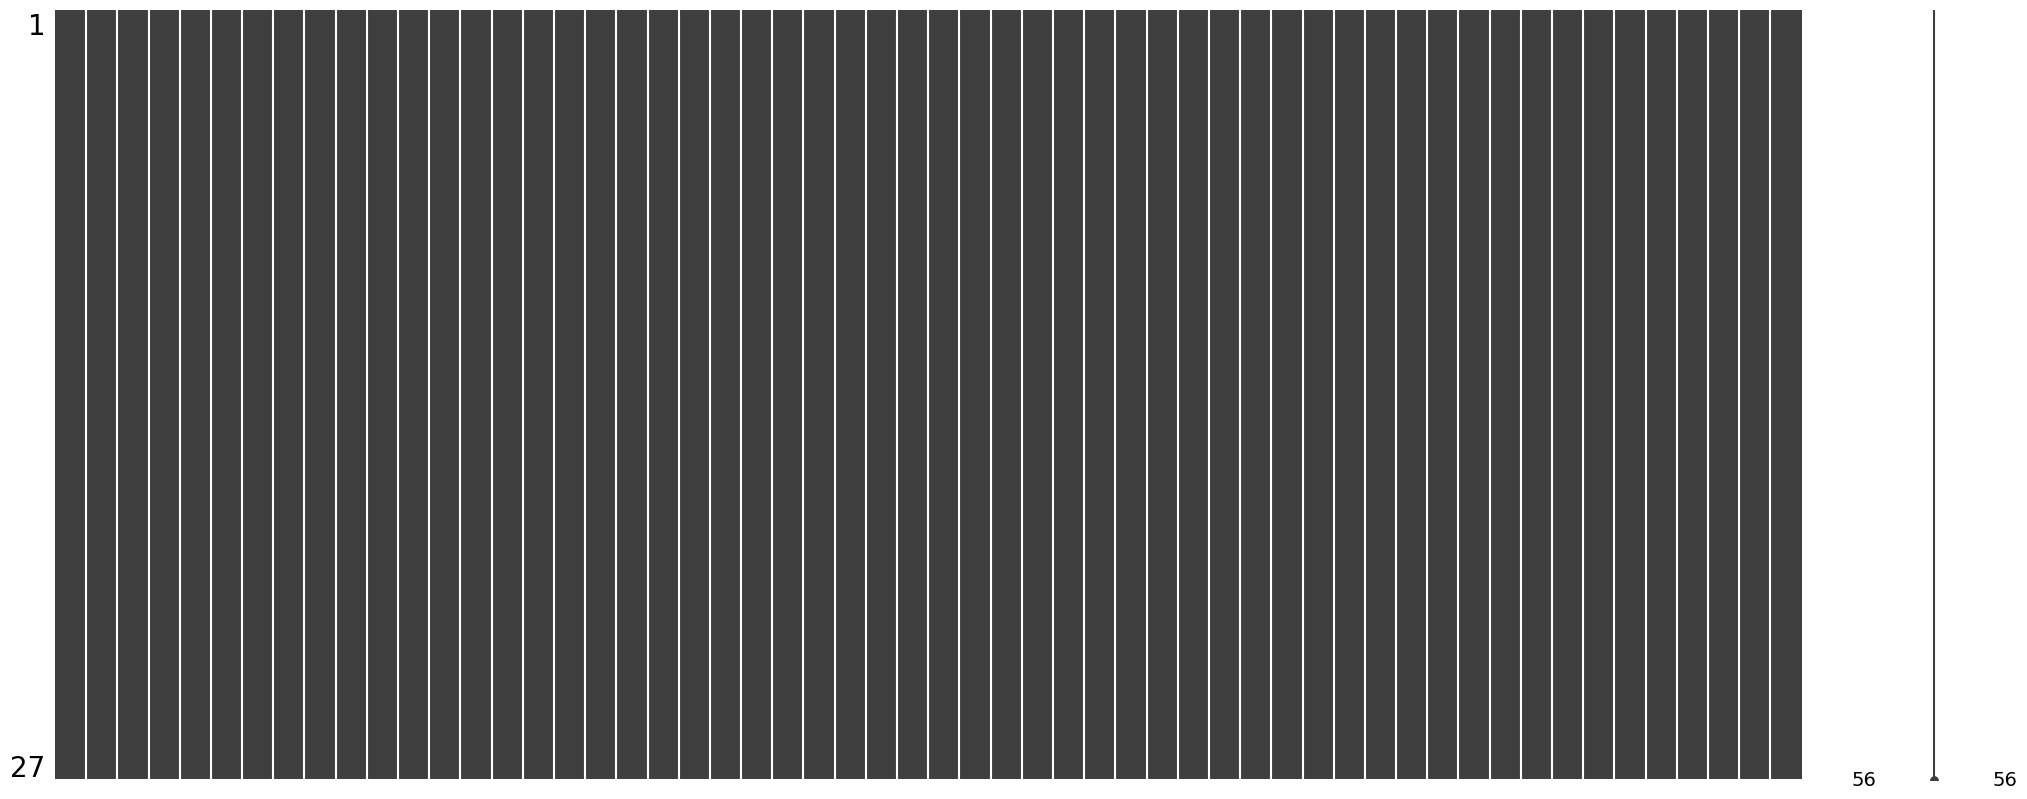

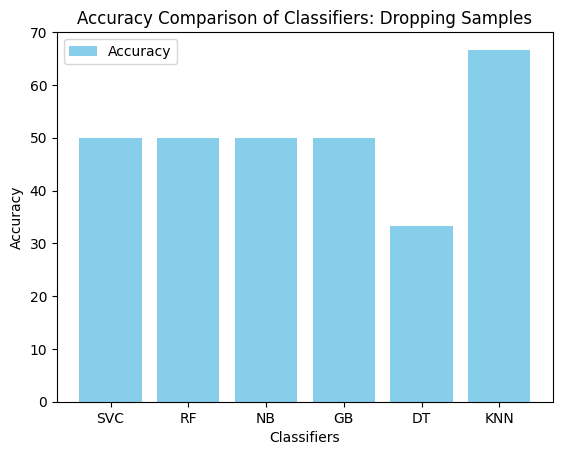

In [ ]:
print(f"Null values before dropping NULL Samples: \n{get_null_values(X)} \n")

data = X.copy()
data.dropna(inplace=True)
print(f"Null values after dropping NULL Samples: \n{get_null_values(data)} \n")

targets = y.loc[data.index, 'class']
# print(targets)

msno.matrix(data)

# Implementing to the classifiers
classifiers = get_default_classifier()
accuracy_list = classifier_implementor(
  data, targets, classifiers,
  chart_title='Dropping Samples'
)

# Dropping Features

Null values before dropping Features: 
Attribute4     4
Attribute38    1
dtype: int64 

Null values after dropping Features: 
Series([], dtype: int64) 

==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 40.0
[Training] Accuracy score: 100.0
[Testing] Accuracy s

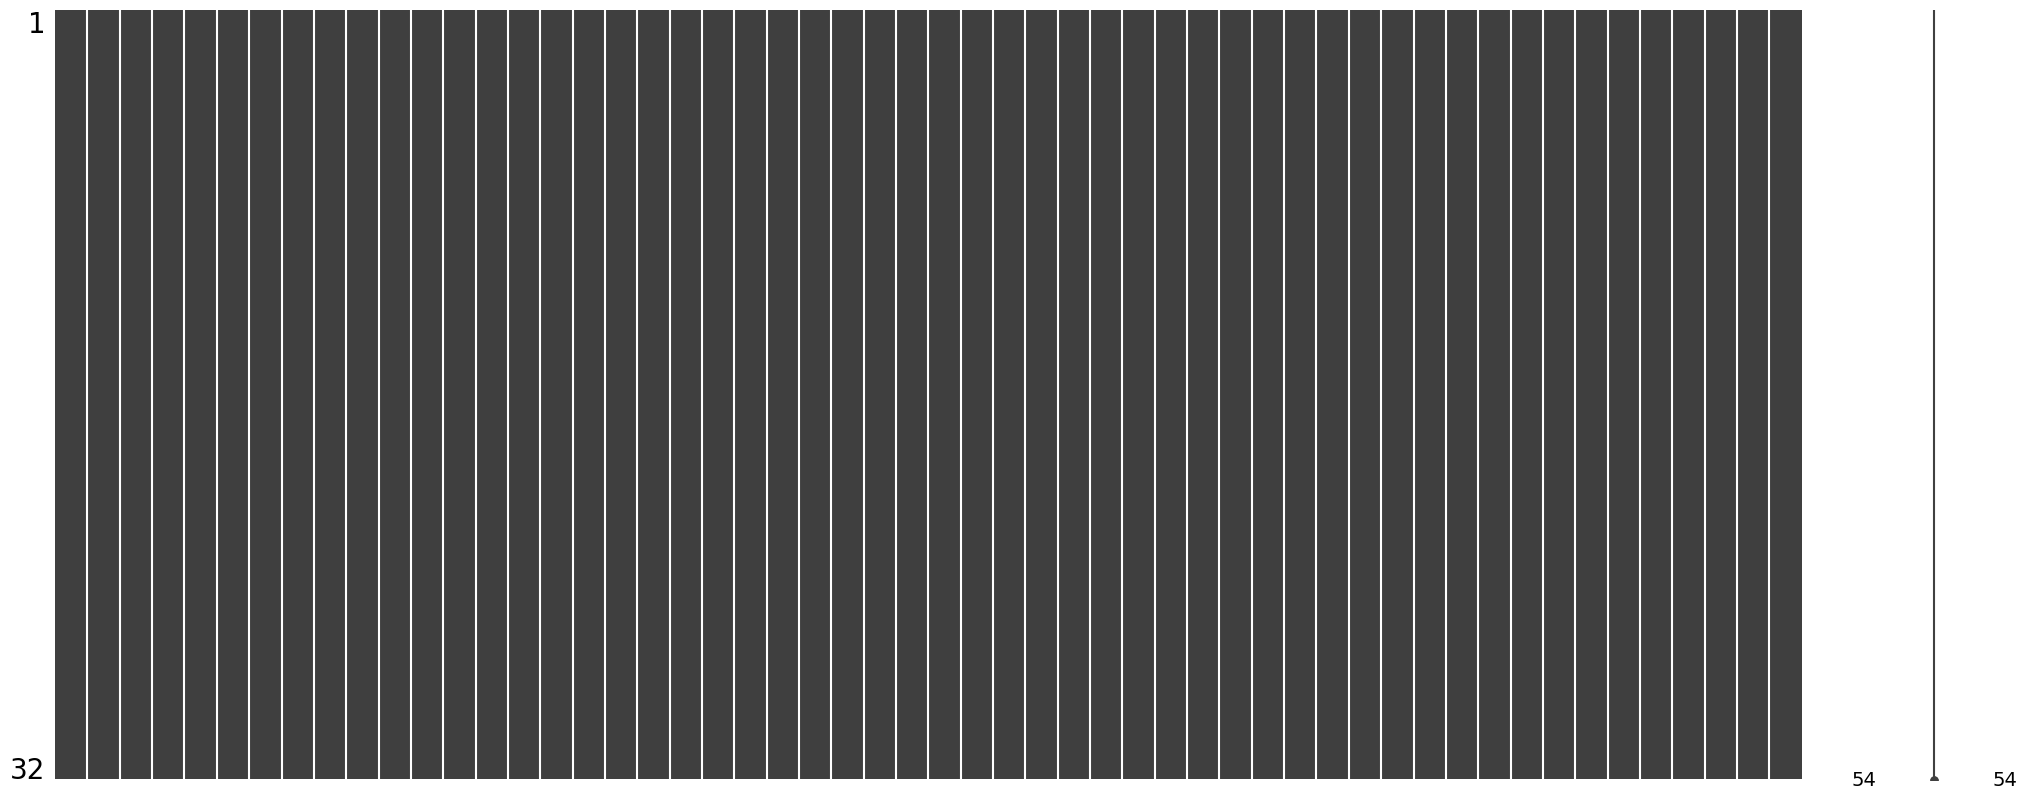

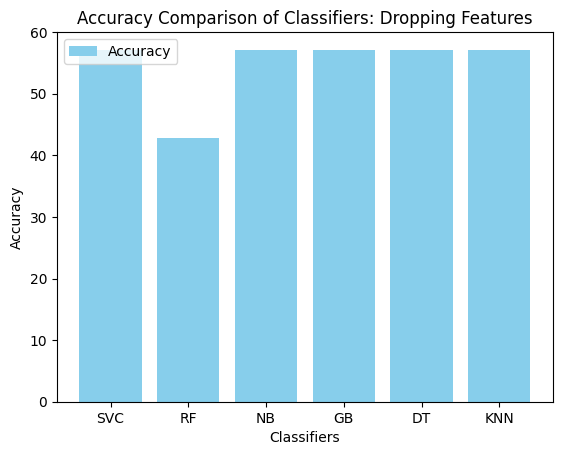

In [ ]:
print(f"Null values before dropping Features: \n{get_null_values(X)} \n")
data = X.copy()
data.dropna(axis=1, inplace=True)
print(f"Null values after dropping Features: \n{get_null_values(data)} \n")

targets = y.loc[data.index, 'class']
msno.matrix(data)

# Implementing to classifiers
classifiers = get_default_classifier()
accuracy_list = classifier_implementor(
  data, targets, classifiers,
  chart_title='Dropping Features'
)

# Data Imputation with Mode

Null values before data imputation (Mode): 
Attribute4     4
Attribute38    1
dtype: int64 

Null values after data imputation (Mode): 
Series([], dtype: int64) 

==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 100.0
[Testing] 

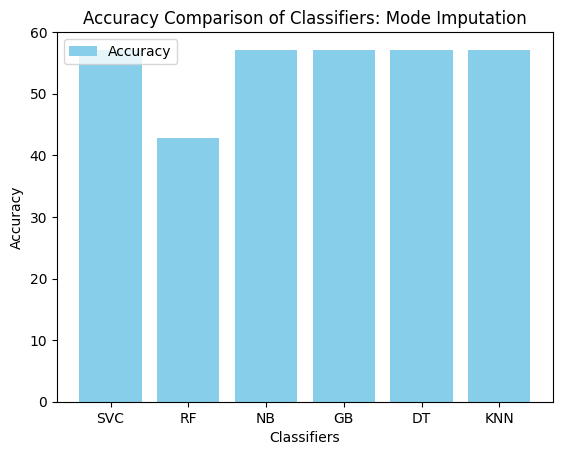

In [ ]:
data = X.copy()
print(f"Null values before data imputation (Mode): \n{get_null_values(data)} \n")

most_frequent_attribute4 = data["Attribute4"].mode()[0]
data["Attribute4"] = data["Attribute4"].fillna(most_frequent_attribute4)

most_frequent_attribute38 = data["Attribute38"].mode()[0]
data["Attribute38"] = data["Attribute38"].fillna(most_frequent_attribute38)

print(f"Null values after data imputation (Mode): \n{get_null_values(data)} \n")

# Implementing to classifiers
classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  data, targets, classifiers,
  chart_title='Mode Imputation'
)

# Data Imputation with Median

Null values before data imputation (median): 
Attribute4     4
Attribute38    1
dtype: int64 

Null values after data imputation (median): 
Series([], dtype: int64) 

==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 44.0
[Training] Accuracy score: 100.0
[Testi

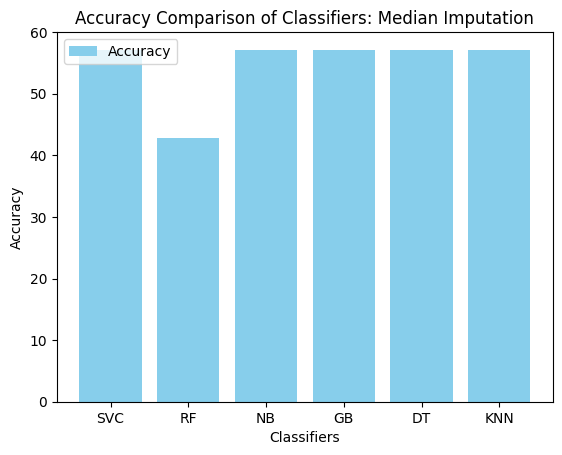

In [ ]:
data = X.copy()
print(f"Null values before data imputation (median): \n{get_null_values(data)} \n")

median_attribute_4 = data["Attribute4"].median()
# print(median_attribute_4)
data["Attribute4"] = data["Attribute4"].fillna(median_attribute_4)

median_attribute_38 = data["Attribute38"].median()
# print(median_attribute_38)
data["Attribute38"] = data["Attribute38"].fillna(median_attribute_38)

print(f"Null values after data imputation (median): \n{get_null_values(data)} \n")

# Implementing to classifiers
classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  data, targets, classifiers,
  chart_title='Median Imputation'
)

# Data Imputation Mean

Null values before data imputation (mean): 
Attribute4     4
Attribute38    1
dtype: int64 

Null values after data imputation (mean): 
Series([], dtype: int64) 

==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 44.0
[Training] Accuracy score: 100.0
[Testing] 

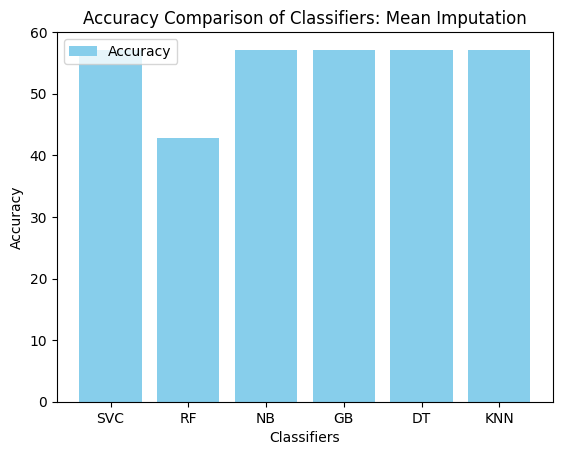

In [ ]:
data = X.copy()
print(f"Null values before data imputation (mean): \n{get_null_values(data)} \n")

mean_attribute_4 = data["Attribute4"].mean()
# print(mean_attribute_4)
data["Attribute4"] = data["Attribute4"].fillna(mean_attribute_4)

mean_attribute_38 = data["Attribute38"].mean()
# print(mean_attribute_38)
data["Attribute38"] = data["Attribute38"].fillna(mean_attribute_38)

print(f"Null values after data imputation (mean): \n{get_null_values(data)} \n")

# Implementing to classifiers
classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  data, targets, classifiers,
  chart_title='Mean Imputation'
)

# SimpleImputer to fill missing data

    Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0            0           3           0         1.0           0           2   
1            0           3           3         1.0           0           3   
2            0           3           3         2.0           0           3   
3            0           2           3         2.0           1           3   
4            0           3           2         1.0           1           3   
5            0           3           3         2.0           0           3   
6            0           3           2         1.0           0           3   
7            0           2           2         1.0           0           3   
8            0           3           1         1.0           0           3   
9            0           2           3         2.0           0           2   
10           0           2           2         0.0           0           3   
11           0           2           3         2.0           0  

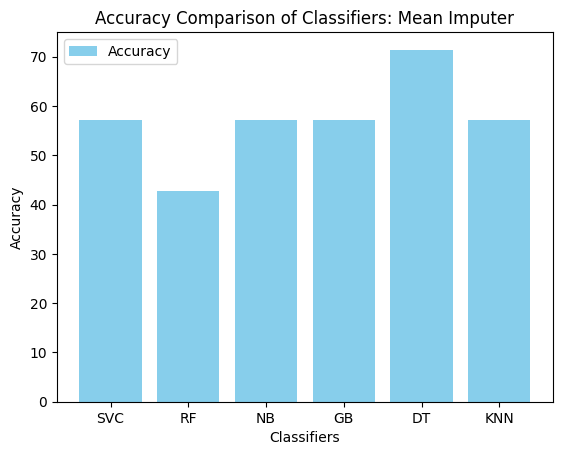

In [ ]:
data = X.copy()

imputer = SimpleImputer(strategy='most_frequent') # mean, median, most_frequent
data[['Attribute4', 'Attribute38']] = np.round(imputer.fit_transform(data[['Attribute4', 'Attribute38']]))
print(data)
# print(data)

# Implementing to classifiers
classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  data, targets, classifiers,
  chart_title='Mean Imputer'
)

# Data Imputation with constant value

==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 40.0
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 57.14
==========================================Process finished =================

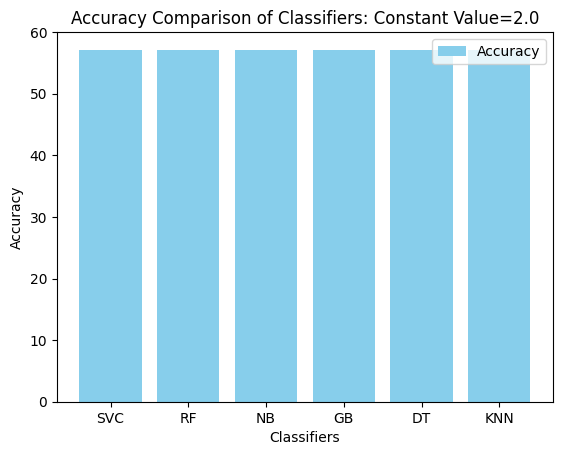

In [ ]:
data = X.copy()

constant_value = 2.0
# print(data["Attribute4"].mode())
# print(data["Attribute38"].mode())
imputer = SimpleImputer(strategy='constant', fill_value=constant_value)
data[['Attribute4', 'Attribute38']] = imputer.fit_transform(data[['Attribute4', 'Attribute38']])

# Implementing to classifiers
classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  data, targets, classifiers,
  chart_title=f'Constant Value={constant_value}'
)

# Impute missing data with XGBRegressor

==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 44.0
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 42.86
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 42.86
==========================================Process finished =================

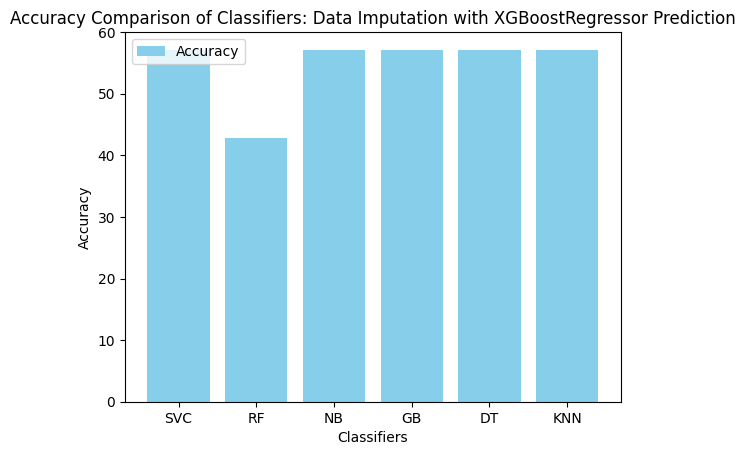

In [ ]:
def impute_feature_with_xgboost(data, feature):
    data_copy = data.copy()

    idx_data_nan = data_copy[data_copy[feature].isnull()].index

    data_test = data_copy[data_copy.index.isin(idx_data_nan)]
    data_train = data_copy.drop(idx_data_nan, axis=0)

    model = XGBRegressor()
    model.fit(data_train.drop(feature, axis=1), data_train[feature])
    pred_col = model.predict(data_test.drop(feature, axis=1))

    data_copy.loc[idx_data_nan, feature] = pred_col
    data_copy[feature] = data_copy[feature].apply(np.floor)

    return data_copy[feature]


imputed_data = X.copy()
imputed_data["Attribute4"] = impute_feature_with_xgboost(X, "Attribute4")
imputed_data["Attribute38"] = impute_feature_with_xgboost(imputed_data, "Attribute38")

classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  imputed_data, targets, classifiers,
  chart_title=f'Data Imputation with XGBoostRegressor Prediction'
)

# Missing Value Imputation with lightgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 25, number of used features: 51
[LightGBM] [Info] Start training from score 1.960000
==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model 

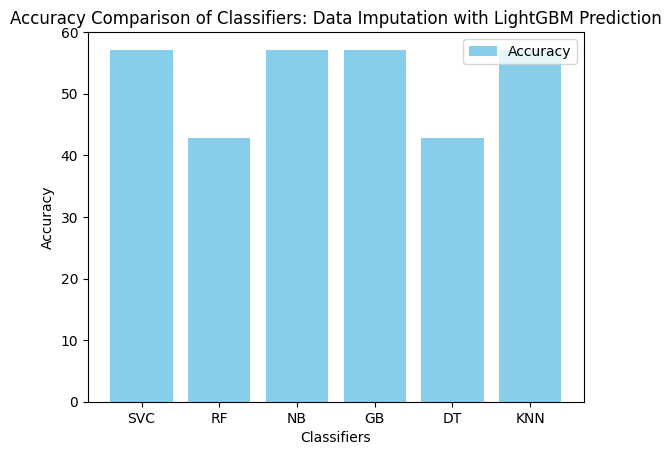

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'learning_rate': 0.05,
    'num_leaves': 3,
    'max_depth':3,
    'min_child_samples': 3
}

model = lgb.train(params, train_data)

# fill missing value
data = X.copy()
missing_attribute4 = data["Attribute4"].isnull()
prediction_attribute4 = np.floor(model.predict(data.loc[missing_attribute4, data.columns]))
data.loc[missing_attribute4, 'Attribute4'] = prediction_attribute4

missing_attribute38 = data["Attribute38"].isnull()
prediction_attribute38 = np.floor(model.predict(data.loc[missing_attribute38, data.columns]))
data.loc[missing_attribute38, 'Attribute38'] = prediction_attribute38

classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  imputed_data, targets, classifiers,
  chart_title=f'Data Imputation with LightGBM Prediction'
)

# Data Imputation with KNN Imputer

==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 52.0
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 71.43
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 71.43
==========================================Process finished =================

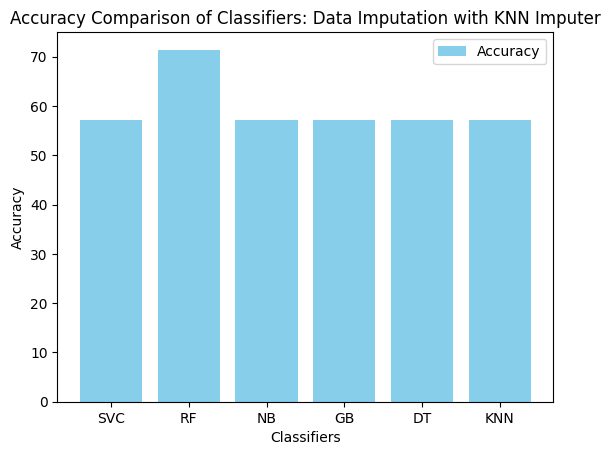

In [ ]:
data = X.copy()

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)

classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  imputed_data, targets, classifiers,
  chart_title=f'Data Imputation with KNN Imputer'
)

# Linear Regression Data Imputation

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 48.0
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 57.14
==========================================Process finished =================

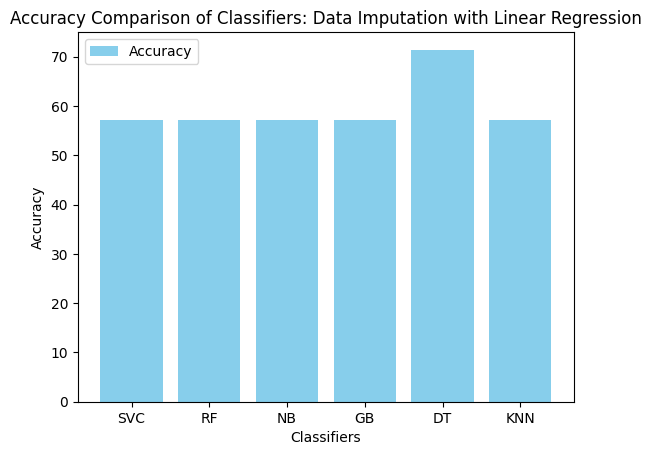

In [ ]:
data = X.copy()
lr = LinearRegression()

imputer = IterativeImputer(
    estimator=lr,
    random_state=100,
    # verbose=2,
    max_iter=10, # ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
    tol=1e-10,
    imputation_order='roman'
)
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)
imputed_data["Attribute4"] = round(imputed_data["Attribute4"])
imputed_data["Attribute38"] = round(imputed_data["Attribute38"])

classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  imputed_data, targets, classifiers,
  chart_title=f'Data Imputation with Linear Regression'
)

# MiceForest

==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 40.0
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 57.14
==========================================Process finished =================

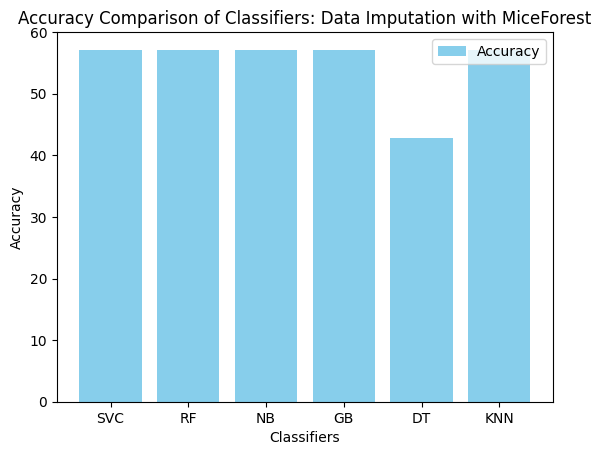

In [ ]:
kds = mf.ImputationKernel(
  X,
  save_all_iterations=True,
  random_state=10
)

# Run the MICE algorithm for 2 iterations
kds.mice(2)

# Return the completed dataset.
df_imputed = kds.complete_data()

classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  df_imputed, targets, classifiers,
  chart_title=f'Data Imputation with MiceForest'
)

# Data interpolation

==========================================SVC ==========================================
Model & Hyperparameters {'class': SVC(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 36.0
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
[Training] Accuracy score: 96.0
[Testing] Accuracy score: 57.14
==========================================Process finished ==========================================


==========================================RF ==========================================
Model & Hyperparameters {'class': RandomForestClassifier(), 'params': {}}
==========================================Result==========================================
[Best params]: {}
[Best Score]: 48.0
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 42.86
[Training] Accuracy score: 100.0
[Testing] Accuracy score: 42.86
==========================================Process finished =================

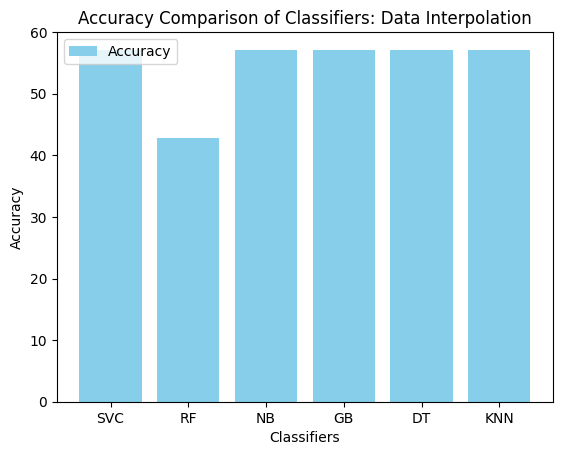

In [ ]:
import math

data = X.copy()
data.interpolate(limit_direction="both", inplace=True)
data["Attribute4"] = round(data["Attribute4"]+0.9)
data["Attribute38"] = round(data["Attribute38"]+0.9)

classifiers = get_default_classifier()
targets = y.loc[data.index, 'class']
accuracy_list = classifier_implementor(
  data, targets, classifiers,
  chart_title=f'Data Interpolation'
)